In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans

# importing necessary libraries and modules

In [165]:
data= pd.read_csv('Virtual Patient Models_Dataset.csv')

# loading data into a pandas dataframe

In [166]:
data.head()

# exploring the data

,part_id,clinical_visit,fried,gender,q_date,age,comorbidities_most_important,hospitalization_one_year,hospitalization_three_years,ortho_hypotension,...,health_rate_comparison,pain_perception,activity_regular,smoking,alcohol_units,katz_index,iadl_grade,comorbidities_count,comorbidities_significant_count,medication_count
0,1084,1,Pre-frail,M,2016-10-05T22:52:28.000Z,78,Non of the above,0,0,No,...,3 - About the same,1.2,> 5 h per week,Past smoker (stopped at least 6 months),1.5,6.0,29,6,2,5
1,1084,2,Pre-frail,M,2017-07-20T00:00:00.000Z,79,Non of the above,0,0,No,...,3 - About the same,1.0,> 5 h per week,Past smoker (stopped at least 6 months),21.0,6.0,25,7,0,6
2,1084,3,Pre-frail,M,2017-12-01T00:00:00.000Z,79,Non of the above,0,0,No,...,3 - About the same,1.3,> 5 h per week,Past smoker (stopped at least 6 months),14.0,6.0,24,7,0,6
3,1084,4,Pre-frail,M,2018-09-24T00:00:00.000Z,80,Non of the above,0,0,No,...,3 - About the same,2.5,> 5 h per week,Past smoker (stopped at least 6 months),18.0,6.0,26,8,0,7
4,1085,1,Non frail,F,2016-10-10T15:04:04.000Z,72,Non of the above,1,3,No,...,3 - About the same,2.5,> 2 h and < 5 h per week,Past smoker (stopped at least 6 months),0.0,6.0,31,11,1,10


In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 59 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   part_id                          117 non-null    int64  
 1   clinical_visit                   117 non-null    int64  
 2   fried                            117 non-null    object 
 3   gender                           117 non-null    object 
 4   q_date                           117 non-null    object 
 5   age                              117 non-null    int64  
 6   comorbidities_most_important     116 non-null    object 
 7   hospitalization_one_year         117 non-null    int64  
 8   hospitalization_three_years      117 non-null    int64  
 9   ortho_hypotension                117 non-null    object 
 10  vision                           117 non-null    object 
 11  audition                         117 non-null    object 
 12  weight_loss           

# Data preprocessing

In [168]:
df= pd.DataFrame(data[['gender', 'age', 'fried', 'ortho_hypotension', 'gait_optional_binary','grip_strength_abnormal','screening_score','cognitive_total_score', 'health_rate', 'katz_index','iadl_grade', 'comorbidities_count']])

# creating a new datafrmae of certain selected features for the purpose of this project

# Description of some selected features
fried : a criteria for fraility, a state of increased vulnerability across multiple health domains that leads to adverse health outcomes

ortho_hypotension : a form of low blood presssure 

gait_optional_binary: The patient's gait score, gait, describes in a quantitative way a person’s walking performance.

cognitive_total_score : measures general cognitive ability and the ability adapt, grasp and handle complexity

katz_index: an index of independence in activities of daily living

iadl_grade: assesses the capacity to handle more complex activities necessary for functioning in community settings ex: shopping, cooking.

comorbidities_count: are distinct health conditions that are present at the same time

In [169]:
df.head()

# exploring the new data frame

,gender,age,fried,ortho_hypotension,gait_optional_binary,grip_strength_abnormal,screening_score,cognitive_total_score,health_rate,katz_index,iadl_grade,comorbidities_count
0,M,78,Pre-frail,No,False,No,14,24.0,4 - Good,6.0,29,6
1,M,79,Pre-frail,No,False,No,14,27.0,4 - Good,6.0,25,7
2,M,79,Pre-frail,No,False,No,14,25.0,4 - Good,6.0,24,7
3,M,80,Pre-frail,No,False,No,13,26.0,4 - Good,6.0,26,8
4,F,72,Non frail,No,False,No,11,22.0,4 - Good,6.0,31,11


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  117 non-null    object 
 1   age                     117 non-null    int64  
 2   fried                   117 non-null    object 
 3   ortho_hypotension       117 non-null    object 
 4   gait_optional_binary    117 non-null    bool   
 5   grip_strength_abnormal  117 non-null    object 
 6   screening_score         117 non-null    int64  
 7   cognitive_total_score   114 non-null    float64
 8   health_rate             117 non-null    object 
 9   katz_index              117 non-null    float64
 10  iadl_grade              117 non-null    int64  
 11  comorbidities_count     117 non-null    int64  
dtypes: bool(1), float64(2), int64(4), object(5)
memory usage: 10.3+ KB


In [171]:
Mean= df['cognitive_total_score'].mean()
df['cognitive_total_score'].fillna(Mean, inplace= True)

#filling the missing values in the cognitive_total_score column with the mean score 

# Data visualization

1. Distribution

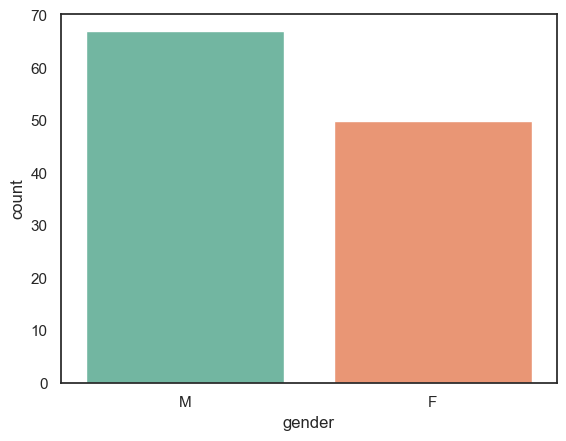

In [172]:
sns.countplot(x='gender',data= df, palette= 'Set2');

# visualizing the distribution of the patients gender in the dataset 

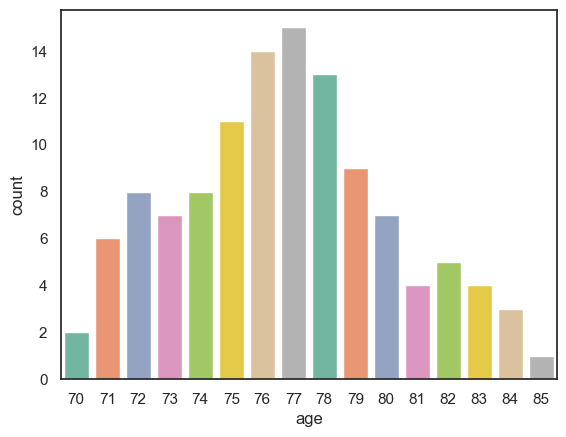

In [173]:
sns.countplot(x = 'age',  data = df, palette= 'Set2');

#visualizing distribution by age

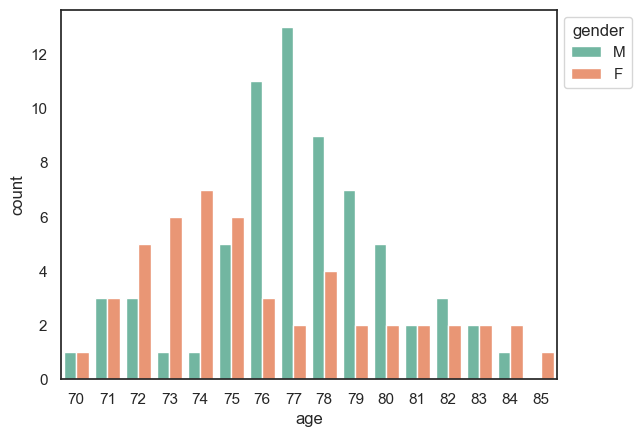

In [174]:
plot1= sns.countplot(data= df, x='age', hue = 'gender', palette= 'Set2')
sns.move_legend(plot1, "upper left", bbox_to_anchor=(1, 1));


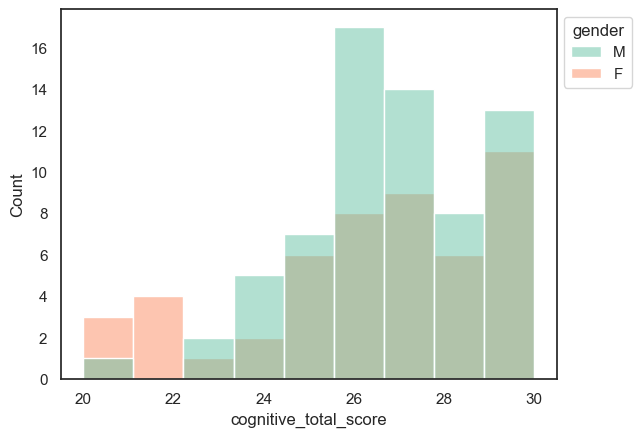

In [175]:
plot2= sns.histplot(data= df, x= df['cognitive_total_score'],hue = 'gender', palette= 'Set2')
sns.move_legend(plot2, "upper left", bbox_to_anchor=(1, 1));

#visualizing distribution by gender and cognitive score

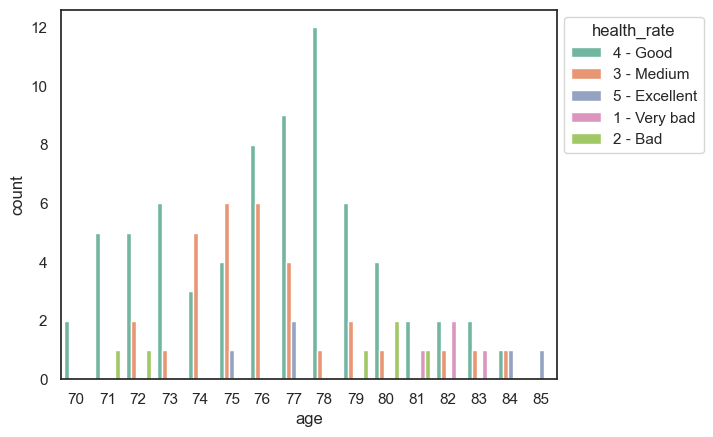

In [176]:
plot3= sns.countplot(x = 'age',  data = df, hue = 'health_rate', palette= 'Set2')
sns.move_legend(plot3, "upper left", bbox_to_anchor=(1, 1));

#visualizing the distribution of patients by age group and health rate

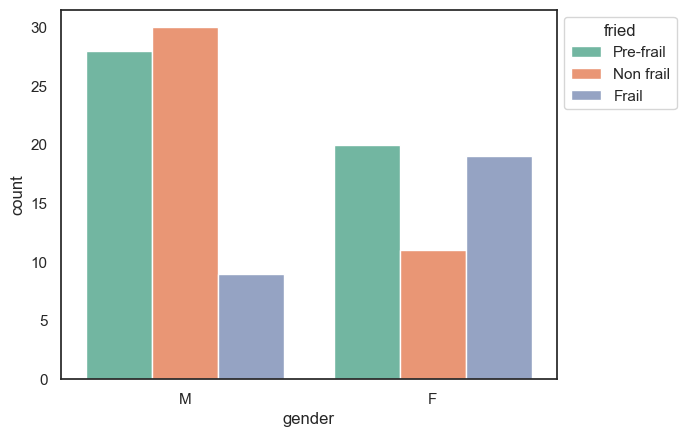

In [177]:
plot4= sns.countplot(x = 'gender',  data = df, hue = 'fried', palette= 'Set2')
sns.move_legend(plot4, "upper left", bbox_to_anchor=(1, 1));

# visualizing distribution by age and fraility

2. Correlation

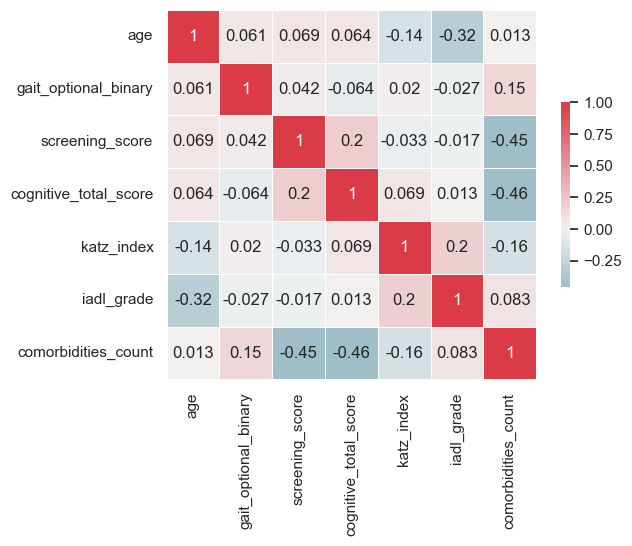

In [178]:
sns.set(style = "white")
cor_matrix = df.corr()

cmap = sns.diverging_palette(220, 10, as_cmap = True)

sns.heatmap(cor_matrix, cmap = cmap, center = 0, square = True, linewidths = .5, cbar_kws = {"shrink": .5}, annot = True, annot_kws = { 'fontsize' : 12 });

# heatmap to represent the correlation between all features

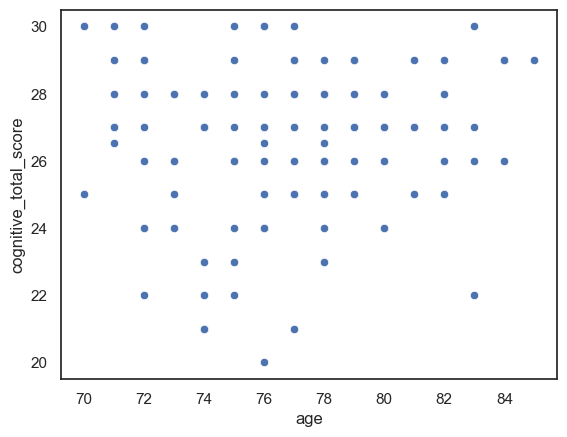

In [180]:
sns.scatterplot(data=df, x= 'age', y= 'cognitive_total_score');

#visualizing correlatio between age and cognition

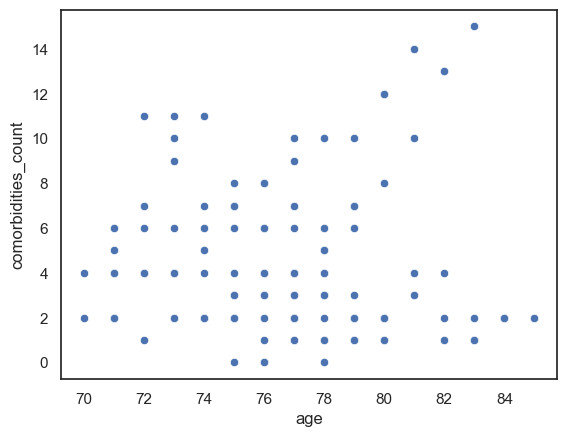

In [182]:
sns.scatterplot(data=df, x= 'age', y= 'comorbidities_count');


# Encoding, scaling, normalizing  and PCA of data for machine learning

In [183]:
encoder = LabelEncoder()
df['gender']= encoder.fit_transform(data['gender'])
df['fried']= encoder.fit_transform(data['fried'])
df['ortho_hypotension']= encoder.fit_transform(data['ortho_hypotension'])
df['gait_optional_binary']= encoder.fit_transform(data['gait_optional_binary'])
df['grip_strength_abnormal']= encoder.fit_transform(data['grip_strength_abnormal'])
df['health_rate']= encoder.fit_transform(data['health_rate'])

# encoding necessary columns

In [184]:
scaler = StandardScaler()
scaling = scaler.fit_transform(df)
scaling.shape
scaled_data = pd.DataFrame(scaling, columns=df.columns)

#scaling data

In [185]:
normalizing = normalize(scaled_data)
normalized_data = pd.DataFrame(normalizing)

# normalizing data

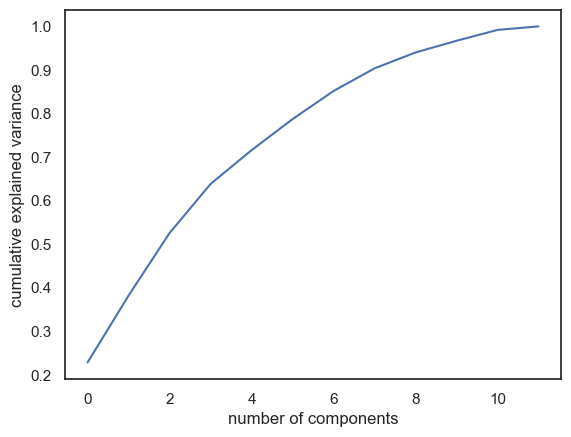

In [186]:
pca = PCA()
pca.fit(normalized_data)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

#visualizing PCA results

In [187]:
np.cumsum(pca.explained_variance_ratio_)

# how much of the variation in the data is explained by each principal components 

array([0.22803181, 0.38168801, 0.52532575, 0.6380437 , 0.71562474,
       0.78697184, 0.85157519, 0.90356132, 0.94011261, 0.96693636,
       0.99187244, 1.        ])

In [188]:
n_components=2
pca_final = PCA(n_components=n_components)
pca_fit = pca_final.fit_transform(normalized_data)
pca_data = pd.DataFrame(pca_fit)
pca_data.columns = ['P1', 'P2']

# pca results

In [189]:
for i in np.arange(n_components):
    index =  np.argmax(np.absolute(pca_final.get_covariance()[i]))
    max_cov = pca_final.get_covariance()[i][index]
    column = df.columns[index]
    print("Principal Component", i+1, "maximum covariance :", "{:.2f}".format(max_cov), "from column", column)
    
# measure which columns have the maximum covariance in pca results

Principal Component 1 maximum covariance : 0.12 from column gender
Principal Component 2 maximum covariance : 0.09 from column age


# Creating a seperate sample to test our model

In [194]:
sample= pca_data.sample(frac =.20)
pca_data.drop(sample.index)

sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 59 to 43
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   P1      23 non-null     float64
 1   P2      23 non-null     float64
dtypes: float64(2)
memory usage: 552.0 bytes


In [195]:
sample.describe()

,P1,P2
count,23.000000,23.000000
mean,0.208373,0.022113
std,0.437824,0.431217
min,-0.657870,-0.691256
25%,-0.085972,-0.321615
50%,0.277414,0.096331
75%,0.528511,0.370006
max,0.770183,0.643630


# First: Agglomerative clustering

In [219]:
model=AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')

# agglomerative clustering model

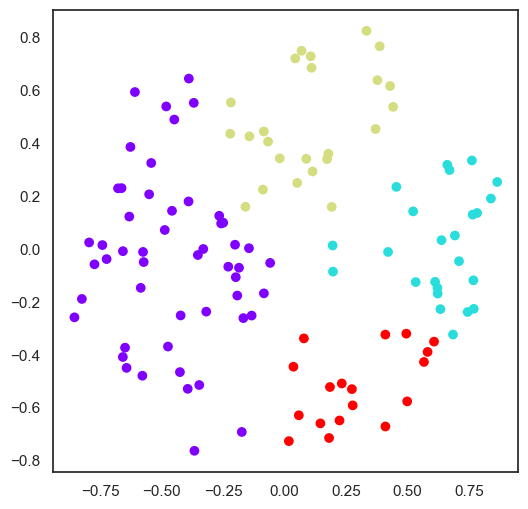

In [220]:
plt.figure(figsize =(6, 6))
plt.scatter(pca_data['P1'], pca_data['P2'],
           c = model.fit_predict(pca_data), cmap ='rainbow')
plt.show()

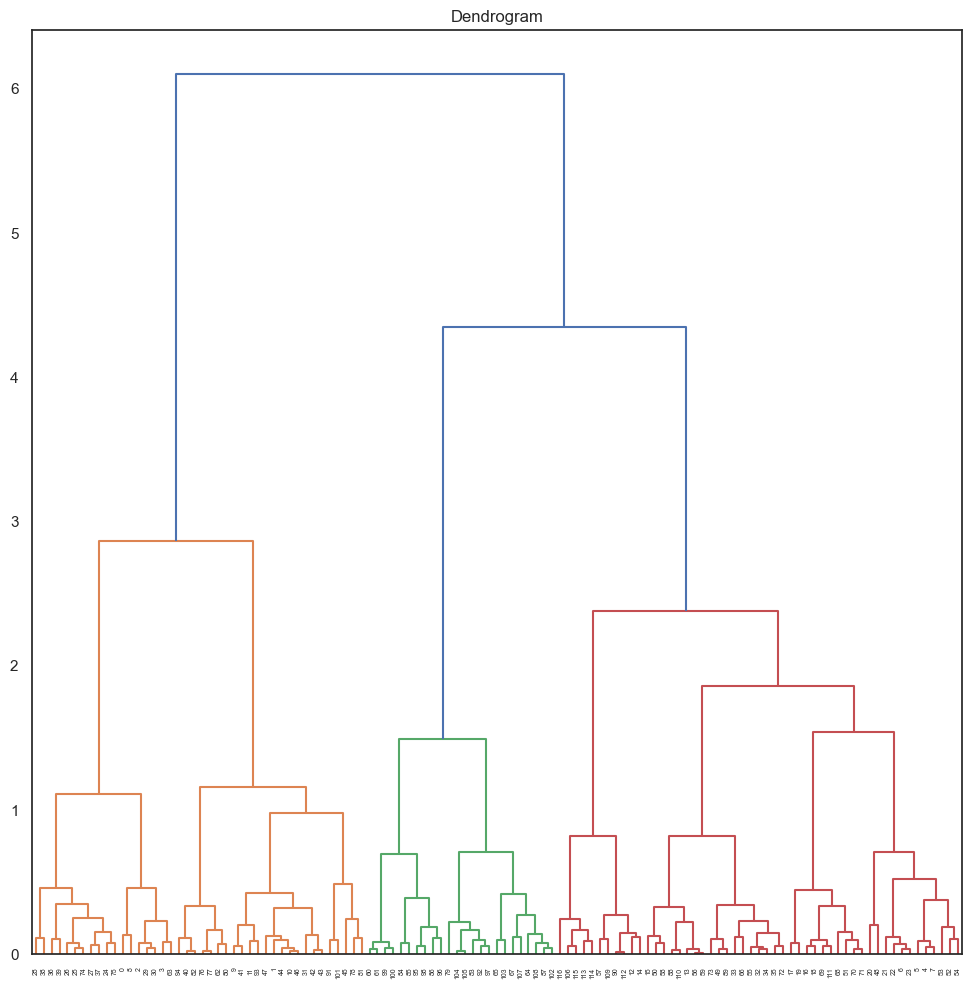

In [221]:
plt.figure(figsize=(12,12))
plt.title("Dendrogram")
dend=shc.dendrogram(shc.linkage(pca_data, method="ward"))

#dendogram plot

# Second: Kmeans clustering

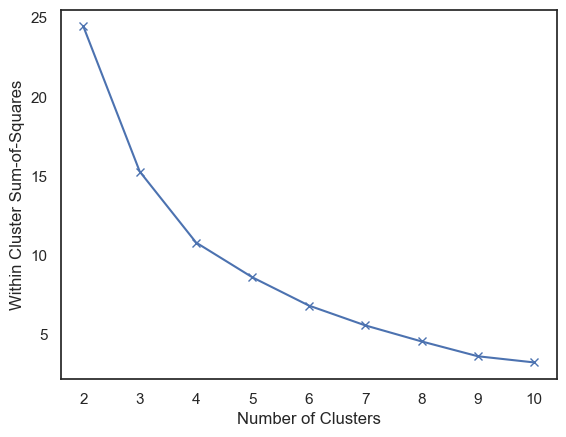

In [222]:
sse = {}
n_clust = np.arange(2,11)

for i in n_clust:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(pca_data)
    sse[i] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel("Number of Clusters")
plt.ylabel("Within Cluster Sum-of-Squares")
plt.show()

#elbow method to find the number of clusters

In [223]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(pca_data)

#kmeans model

KMeans(n_clusters=4, random_state=0)

In [224]:
kmeans.predict(pca_data)
print(kmeans.cluster_centers_)

#printing cluster centers

[[ 0.61532856 -0.05230825]
 [ 0.00587443  0.49174744]
 [-0.45670275 -0.0849125 ]
 [ 0.13866894 -0.60050576]]


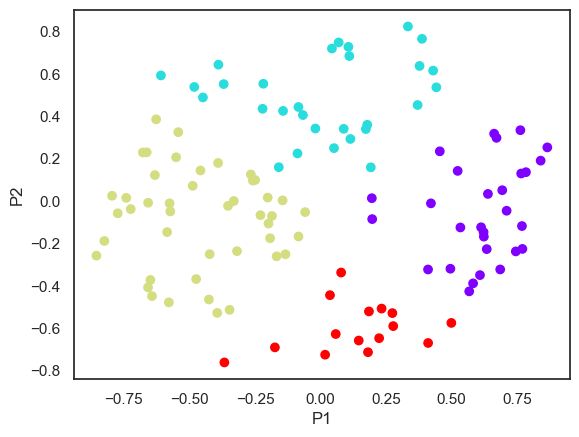

In [225]:
plt.scatter(pca_data['P1'], pca_data['P2'],
            c = KMeans(n_clusters = 4).fit_predict(pca_data),
            cmap ='rainbow')
plt.xlabel("P1")
plt.ylabel("P2")

plt.show() 

# Testing on sample data

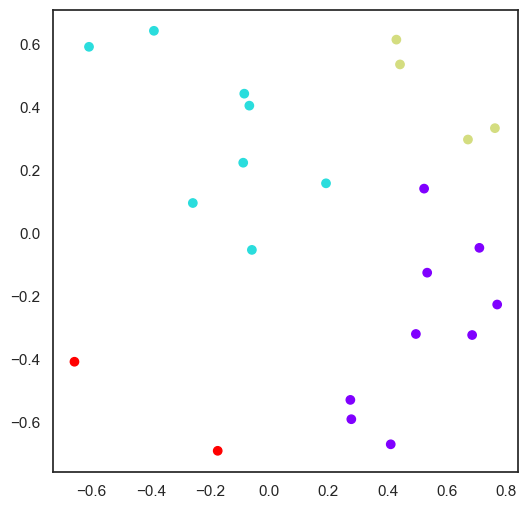

In [226]:
plt.figure(figsize =(6, 6))
plt.scatter(sample['P1'], sample['P2'],
           c = model.fit_predict(sample), cmap ='rainbow')
plt.show()

# testing agglomerative model

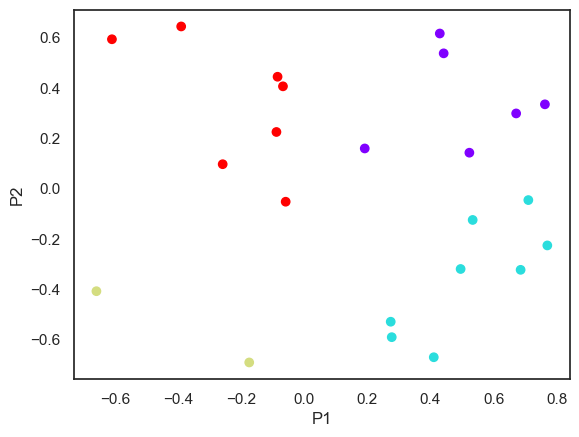

In [227]:
plt.scatter(sample['P1'], sample['P2'],
            c = KMeans(n_clusters = 4).fit_predict(sample),
            cmap ='rainbow')
plt.xlabel("P1")
plt.ylabel("P2")

plt.show() 

# testing kmeans model